## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  46.508761  1273.436818  0.942396  9.956087  1.587997
1  97.628801   610.737385  0.133711  3.161103  0.680031
2  69.213085   453.254683  0.367563  1.250577  1.201957
3  71.208317  1571.972587  0.516819  1.340716  1.468719
4  82.378168  1196.707607  0.617404  7.009686  1.529477


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9993324	total: 59.5ms	remaining: 59.4s
1:	learn: 0.9902885	total: 60.8ms	remaining: 30.4s
2:	learn: 0.9806564	total: 61.3ms	remaining: 20.4s
3:	learn: 0.9695536	total: 62.3ms	remaining: 15.5s
4:	learn: 0.9586346	total: 63.8ms	remaining: 12.7s
5:	learn: 0.9499542	total: 65ms	remaining: 10.8s
6:	learn: 0.9406380	total: 65.9ms	remaining: 9.34s
7:	learn: 0.9304043	total: 67.9ms	remaining: 8.42s
8:	learn: 0.9207016	total: 68.4ms	remaining: 7.53s
9:	learn: 0.9096217	total: 69.2ms	remaining: 6.85s
10:	learn: 0.9009139	total: 69.7ms	remaining: 6.26s
11:	learn: 0.8911571	total: 70.8ms	remaining: 5.83s
12:	learn: 0.8829460	total: 74.2ms	remaining: 5.63s
13:	learn: 0.8735724	total: 78.4ms	remaining: 5.52s
14:	learn: 0.8640963	total: 78.9ms	remaining: 5.18s
15:	learn: 0.8539130	total: 79.3ms	remaining: 4.88s
16:	learn: 0.8465696	total: 83.9ms	remaining: 4.85s
17:	learn: 0.8377289	total: 84.3ms	remaining: 4.6s
18:	learn: 0.8309290	total: 84.9ms	remaining: 4

48:	learn: 0.6236692	total: 102ms	remaining: 1.99s
49:	learn: 0.6181481	total: 103ms	remaining: 1.95s
50:	learn: 0.6139589	total: 104ms	remaining: 1.94s
51:	learn: 0.6077421	total: 105ms	remaining: 1.91s
52:	learn: 0.6028052	total: 105ms	remaining: 1.88s
53:	learn: 0.5977806	total: 106ms	remaining: 1.85s
54:	learn: 0.5917979	total: 106ms	remaining: 1.82s
55:	learn: 0.5856989	total: 106ms	remaining: 1.79s
56:	learn: 0.5814201	total: 107ms	remaining: 1.77s
57:	learn: 0.5761226	total: 107ms	remaining: 1.74s
58:	learn: 0.5716553	total: 108ms	remaining: 1.72s
59:	learn: 0.5670405	total: 108ms	remaining: 1.69s
60:	learn: 0.5616760	total: 109ms	remaining: 1.67s
61:	learn: 0.5567258	total: 109ms	remaining: 1.65s
62:	learn: 0.5517949	total: 121ms	remaining: 1.81s
63:	learn: 0.5481975	total: 122ms	remaining: 1.79s
64:	learn: 0.5429743	total: 123ms	remaining: 1.77s
65:	learn: 0.5374499	total: 123ms	remaining: 1.74s
66:	learn: 0.5335309	total: 124ms	remaining: 1.72s
67:	learn: 0.5294019	total: 126

109:	learn: 0.3837639	total: 182ms	remaining: 1.47s
110:	learn: 0.3803906	total: 184ms	remaining: 1.47s
111:	learn: 0.3782302	total: 184ms	remaining: 1.46s
112:	learn: 0.3755157	total: 185ms	remaining: 1.45s
113:	learn: 0.3729423	total: 185ms	remaining: 1.44s
114:	learn: 0.3698725	total: 188ms	remaining: 1.45s
115:	learn: 0.3671113	total: 189ms	remaining: 1.44s
116:	learn: 0.3645309	total: 190ms	remaining: 1.44s
117:	learn: 0.3612441	total: 191ms	remaining: 1.43s
118:	learn: 0.3589017	total: 192ms	remaining: 1.42s
119:	learn: 0.3571568	total: 200ms	remaining: 1.46s
120:	learn: 0.3546041	total: 200ms	remaining: 1.45s
121:	learn: 0.3515504	total: 201ms	remaining: 1.44s
122:	learn: 0.3491143	total: 201ms	remaining: 1.43s
123:	learn: 0.3472619	total: 205ms	remaining: 1.45s
124:	learn: 0.3443943	total: 206ms	remaining: 1.44s
125:	learn: 0.3417307	total: 206ms	remaining: 1.43s
126:	learn: 0.3395544	total: 207ms	remaining: 1.42s
127:	learn: 0.3369309	total: 208ms	remaining: 1.41s
128:	learn: 

151:	learn: 0.2852521	total: 247ms	remaining: 1.38s
152:	learn: 0.2836009	total: 248ms	remaining: 1.37s
153:	learn: 0.2818024	total: 248ms	remaining: 1.36s
154:	learn: 0.2802758	total: 249ms	remaining: 1.35s
155:	learn: 0.2786839	total: 249ms	remaining: 1.35s
156:	learn: 0.2766598	total: 249ms	remaining: 1.34s
157:	learn: 0.2746168	total: 250ms	remaining: 1.33s
158:	learn: 0.2731204	total: 250ms	remaining: 1.32s
159:	learn: 0.2717627	total: 252ms	remaining: 1.32s
160:	learn: 0.2702124	total: 253ms	remaining: 1.32s
161:	learn: 0.2687631	total: 253ms	remaining: 1.31s
162:	learn: 0.2670446	total: 254ms	remaining: 1.3s
163:	learn: 0.2652448	total: 255ms	remaining: 1.3s
164:	learn: 0.2638383	total: 256ms	remaining: 1.3s
165:	learn: 0.2619830	total: 257ms	remaining: 1.29s
166:	learn: 0.2601990	total: 258ms	remaining: 1.28s
167:	learn: 0.2588839	total: 258ms	remaining: 1.28s
168:	learn: 0.2571557	total: 259ms	remaining: 1.27s
169:	learn: 0.2558199	total: 259ms	remaining: 1.27s
170:	learn: 0.2

226:	learn: 0.1926017	total: 352ms	remaining: 1.2s
227:	learn: 0.1915666	total: 353ms	remaining: 1.19s
228:	learn: 0.1906597	total: 355ms	remaining: 1.19s
229:	learn: 0.1897272	total: 355ms	remaining: 1.19s
230:	learn: 0.1888143	total: 356ms	remaining: 1.18s
231:	learn: 0.1881877	total: 356ms	remaining: 1.18s
232:	learn: 0.1875101	total: 358ms	remaining: 1.18s
233:	learn: 0.1867836	total: 359ms	remaining: 1.18s
234:	learn: 0.1861544	total: 361ms	remaining: 1.17s
235:	learn: 0.1852349	total: 362ms	remaining: 1.17s
236:	learn: 0.1842306	total: 365ms	remaining: 1.17s
237:	learn: 0.1836349	total: 365ms	remaining: 1.17s
238:	learn: 0.1828912	total: 366ms	remaining: 1.16s
239:	learn: 0.1821135	total: 366ms	remaining: 1.16s
240:	learn: 0.1812691	total: 367ms	remaining: 1.15s
241:	learn: 0.1806864	total: 369ms	remaining: 1.15s
242:	learn: 0.1800708	total: 369ms	remaining: 1.15s
243:	learn: 0.1793313	total: 370ms	remaining: 1.15s
244:	learn: 0.1785197	total: 370ms	remaining: 1.14s
245:	learn: 0

306:	learn: 0.1448060	total: 456ms	remaining: 1.03s
307:	learn: 0.1438301	total: 460ms	remaining: 1.03s
308:	learn: 0.1429926	total: 460ms	remaining: 1.03s
309:	learn: 0.1418997	total: 461ms	remaining: 1.02s
310:	learn: 0.1415870	total: 461ms	remaining: 1.02s
311:	learn: 0.1413076	total: 463ms	remaining: 1.02s
312:	learn: 0.1410346	total: 465ms	remaining: 1.02s
313:	learn: 0.1401823	total: 468ms	remaining: 1.02s
314:	learn: 0.1397248	total: 469ms	remaining: 1.02s
315:	learn: 0.1394641	total: 470ms	remaining: 1.02s
316:	learn: 0.1392334	total: 470ms	remaining: 1.01s
317:	learn: 0.1389819	total: 473ms	remaining: 1.01s
318:	learn: 0.1387361	total: 488ms	remaining: 1.04s
319:	learn: 0.1384959	total: 488ms	remaining: 1.04s
320:	learn: 0.1383071	total: 489ms	remaining: 1.03s
321:	learn: 0.1380922	total: 490ms	remaining: 1.03s
322:	learn: 0.1379451	total: 490ms	remaining: 1.03s
323:	learn: 0.1377744	total: 491ms	remaining: 1.02s
324:	learn: 0.1375476	total: 493ms	remaining: 1.02s
325:	learn: 

356:	learn: 0.1301662	total: 535ms	remaining: 964ms
357:	learn: 0.1300528	total: 539ms	remaining: 966ms
358:	learn: 0.1296618	total: 540ms	remaining: 965ms
359:	learn: 0.1292181	total: 543ms	remaining: 965ms
360:	learn: 0.1283073	total: 544ms	remaining: 962ms
361:	learn: 0.1276717	total: 545ms	remaining: 960ms
362:	learn: 0.1267856	total: 545ms	remaining: 957ms
363:	learn: 0.1264250	total: 546ms	remaining: 953ms
364:	learn: 0.1254593	total: 546ms	remaining: 950ms
365:	learn: 0.1253514	total: 547ms	remaining: 947ms
366:	learn: 0.1252454	total: 547ms	remaining: 944ms
367:	learn: 0.1251413	total: 548ms	remaining: 940ms
368:	learn: 0.1246797	total: 548ms	remaining: 937ms
369:	learn: 0.1240820	total: 548ms	remaining: 934ms
370:	learn: 0.1233109	total: 554ms	remaining: 940ms
371:	learn: 0.1231800	total: 555ms	remaining: 936ms
372:	learn: 0.1230519	total: 555ms	remaining: 934ms
373:	learn: 0.1229536	total: 556ms	remaining: 931ms
374:	learn: 0.1221339	total: 556ms	remaining: 927ms
375:	learn: 

535:	learn: 0.0692808	total: 667ms	remaining: 578ms
536:	learn: 0.0690044	total: 668ms	remaining: 576ms
537:	learn: 0.0687497	total: 669ms	remaining: 574ms
538:	learn: 0.0684878	total: 669ms	remaining: 572ms
539:	learn: 0.0682312	total: 670ms	remaining: 570ms
540:	learn: 0.0679299	total: 671ms	remaining: 570ms
541:	learn: 0.0676791	total: 672ms	remaining: 568ms
542:	learn: 0.0675007	total: 672ms	remaining: 566ms
543:	learn: 0.0673242	total: 673ms	remaining: 564ms
544:	learn: 0.0670409	total: 674ms	remaining: 563ms
545:	learn: 0.0668710	total: 675ms	remaining: 561ms
546:	learn: 0.0664424	total: 677ms	remaining: 560ms
547:	learn: 0.0661667	total: 678ms	remaining: 559ms
548:	learn: 0.0659944	total: 679ms	remaining: 558ms
549:	learn: 0.0657068	total: 680ms	remaining: 556ms
550:	learn: 0.0652897	total: 681ms	remaining: 555ms
551:	learn: 0.0650232	total: 681ms	remaining: 553ms
552:	learn: 0.0648559	total: 694ms	remaining: 561ms
553:	learn: 0.0644496	total: 695ms	remaining: 559ms
554:	learn: 

690:	learn: 0.0422672	total: 789ms	remaining: 353ms
691:	learn: 0.0421499	total: 791ms	remaining: 352ms
692:	learn: 0.0420076	total: 791ms	remaining: 351ms
693:	learn: 0.0418582	total: 792ms	remaining: 349ms
694:	learn: 0.0417199	total: 793ms	remaining: 348ms
695:	learn: 0.0416129	total: 793ms	remaining: 347ms
696:	learn: 0.0414779	total: 794ms	remaining: 345ms
697:	learn: 0.0414141	total: 794ms	remaining: 344ms
698:	learn: 0.0413514	total: 795ms	remaining: 342ms
699:	learn: 0.0412489	total: 795ms	remaining: 341ms
700:	learn: 0.0411056	total: 796ms	remaining: 339ms
701:	learn: 0.0409480	total: 797ms	remaining: 338ms
702:	learn: 0.0408201	total: 797ms	remaining: 337ms
703:	learn: 0.0406662	total: 799ms	remaining: 336ms
704:	learn: 0.0405288	total: 800ms	remaining: 335ms
705:	learn: 0.0403781	total: 800ms	remaining: 333ms
706:	learn: 0.0402335	total: 802ms	remaining: 332ms
707:	learn: 0.0400955	total: 802ms	remaining: 331ms
708:	learn: 0.0399121	total: 803ms	remaining: 330ms
709:	learn: 

776:	learn: 0.0350525	total: 867ms	remaining: 249ms
777:	learn: 0.0349966	total: 869ms	remaining: 248ms
778:	learn: 0.0349356	total: 870ms	remaining: 247ms
779:	learn: 0.0348717	total: 871ms	remaining: 246ms
780:	learn: 0.0348091	total: 872ms	remaining: 245ms
781:	learn: 0.0347779	total: 873ms	remaining: 243ms
782:	learn: 0.0346823	total: 874ms	remaining: 242ms
783:	learn: 0.0346229	total: 875ms	remaining: 241ms
784:	learn: 0.0345239	total: 875ms	remaining: 240ms
785:	learn: 0.0344934	total: 876ms	remaining: 238ms
786:	learn: 0.0344111	total: 876ms	remaining: 237ms
787:	learn: 0.0343527	total: 877ms	remaining: 236ms
788:	learn: 0.0343228	total: 877ms	remaining: 235ms
789:	learn: 0.0342655	total: 878ms	remaining: 233ms
790:	learn: 0.0341700	total: 878ms	remaining: 232ms
791:	learn: 0.0340885	total: 879ms	remaining: 231ms
792:	learn: 0.0340235	total: 879ms	remaining: 229ms
793:	learn: 0.0339648	total: 879ms	remaining: 228ms
794:	learn: 0.0338970	total: 880ms	remaining: 227ms
795:	learn: 

946:	learn: 0.0221391	total: 979ms	remaining: 54.8ms
947:	learn: 0.0220714	total: 980ms	remaining: 53.8ms
948:	learn: 0.0219557	total: 981ms	remaining: 52.7ms
949:	learn: 0.0219003	total: 981ms	remaining: 51.7ms
950:	learn: 0.0218338	total: 982ms	remaining: 50.6ms
951:	learn: 0.0217864	total: 982ms	remaining: 49.5ms
952:	learn: 0.0217605	total: 983ms	remaining: 48.5ms
953:	learn: 0.0217331	total: 983ms	remaining: 47.4ms
954:	learn: 0.0216899	total: 984ms	remaining: 46.4ms
955:	learn: 0.0215781	total: 984ms	remaining: 45.3ms
956:	learn: 0.0215518	total: 985ms	remaining: 44.3ms
957:	learn: 0.0214982	total: 985ms	remaining: 43.2ms
958:	learn: 0.0214683	total: 986ms	remaining: 42.1ms
959:	learn: 0.0214519	total: 986ms	remaining: 41.1ms
960:	learn: 0.0214269	total: 987ms	remaining: 40.1ms
961:	learn: 0.0213833	total: 987ms	remaining: 39ms
962:	learn: 0.0213402	total: 988ms	remaining: 38ms
963:	learn: 0.0212317	total: 988ms	remaining: 36.9ms
964:	learn: 0.0212160	total: 989ms	remaining: 35.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.2558979100109132


ABC Pre-generator MAE 1.1815391777781896


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

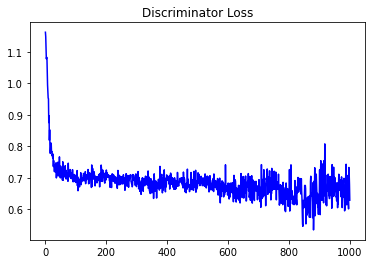

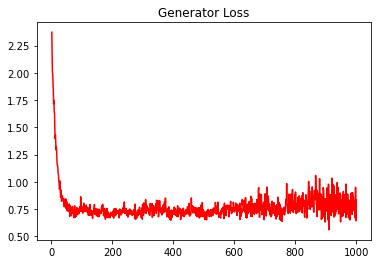

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.566545141749084


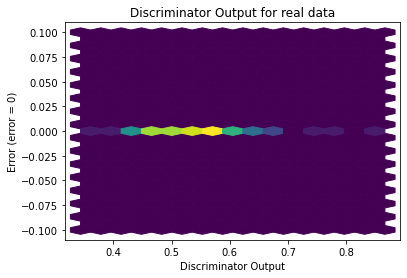

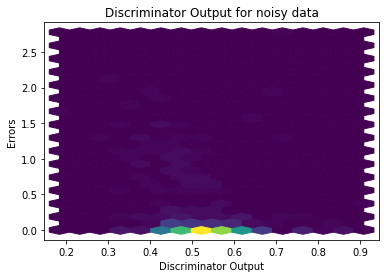

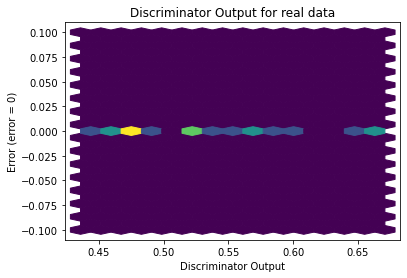

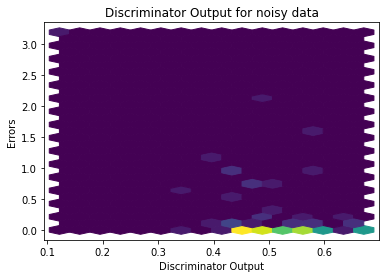

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

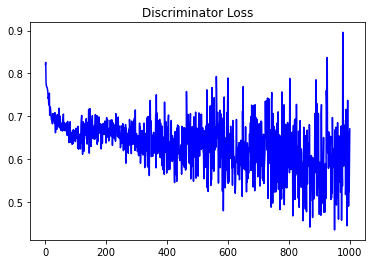

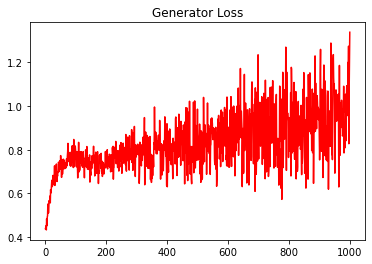

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
1.2448256754670293


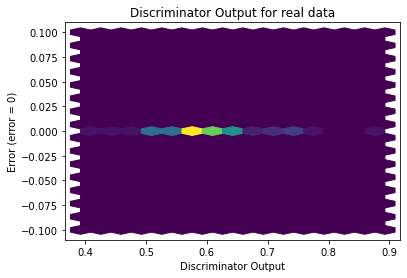

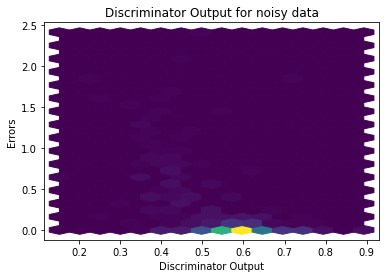

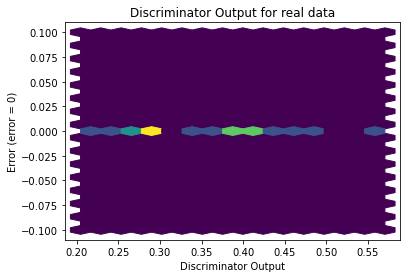

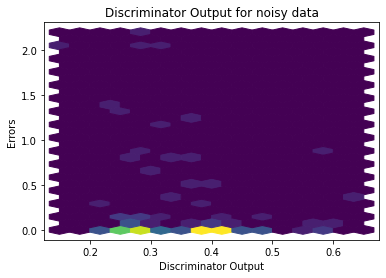

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


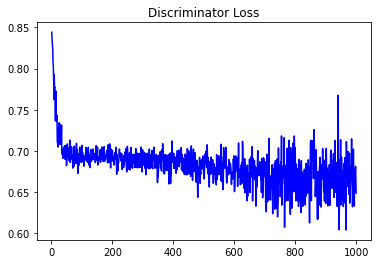

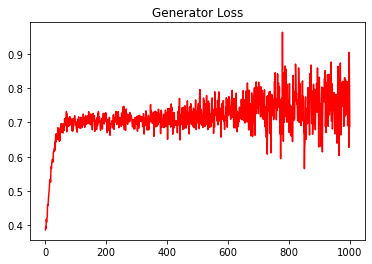

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
4.488883325494826


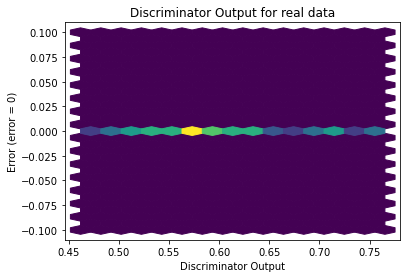

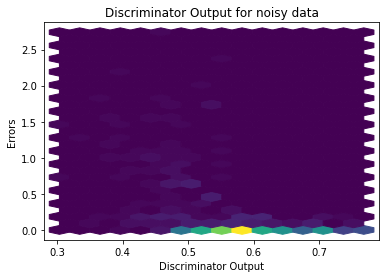

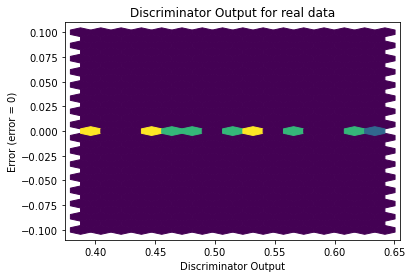

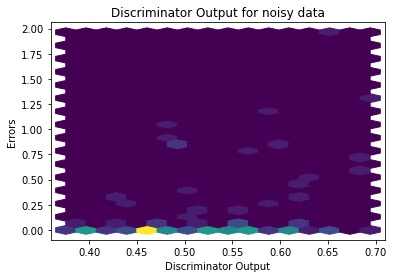

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


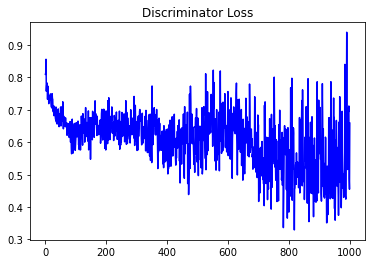

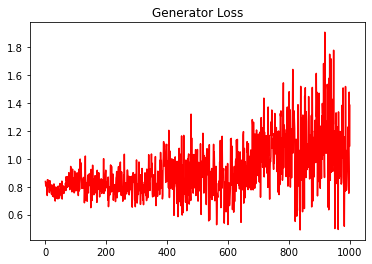

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
1.0519212197959422


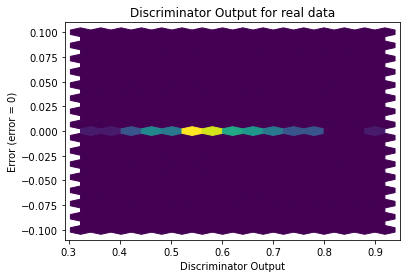

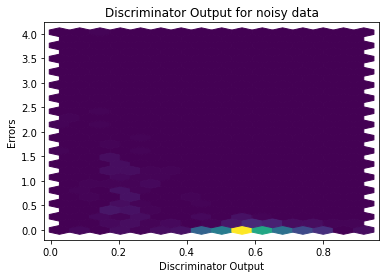

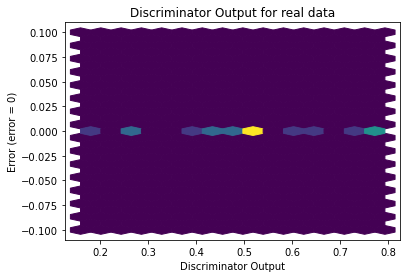

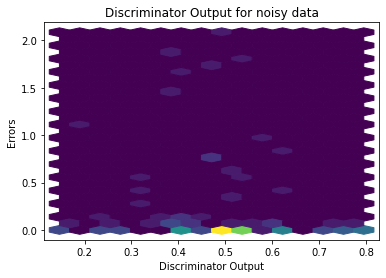

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1642]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4680]], requires_grad=True)
